<a href="https://colab.research.google.com/github/shaad4224/credit_card_default_prediction/blob/main/Copy_of_credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name** - Credit Card Default Prediction

###**Project Type** - Classification
###**Contribution** - Individual
###**Submitted by** - Shadab Husain

##**Project Summary** -


##**GitHub Link** -

##**Problem Statement**

##**Let's Begin !**

##**1. Know Your Data**

###Import Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

###Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/capstone/default of credit card clients.xls - Data.xlsx - default of credit card clients..csv')

###Dataset First View

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


###Dataset Rows & Columns count

In [5]:
df.shape

(30000, 25)

###Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

###Duplicate Values

In [7]:
len(df[df.duplicated()])

0

###Missing Values/Null Values

In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

###What did you know about your dataset?

There are around information of three thousand people and have 24 features to explain it. Data has no duplicate values and missing values so, Now our data is clean. lets move further.


##**2. Understanding Your Variables**

In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


###Variables Description

This information was not available AlmaBetter. So I procured this from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

*  ID: ID of each client
*  LIMIT_BAL: Amount of given credit in NT dollars (includes individual  and      family/supplementary credit
*  SEX: Gender (1=male, 2=female)
*  EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*  MARRIAGE: Marital status (1=married, 2=single, 3=others)
*  AGE: Age in years
*  PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
*  PAY_2: Repayment status in August, 2005 (scale same as above)
*  PAY_3: Repayment status in July, 2005 (scale same as above)
*  PAY_4: Repayment status in June, 2005 (scale same as above)
*  PAY_5: Repayment status in May, 2005 (scale same as above)
*  PAY_6: Repayment status in April, 2005 (scale same as above)
*  BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*  BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*  BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*  BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*  BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*  BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*  PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*  PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*  PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*  PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*  PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*  PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

###Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns:
  print("Unique values of",i,"is",df[i].nunique())

Unique values of ID is 30000
Unique values of LIMIT_BAL is 81
Unique values of SEX is 2
Unique values of EDUCATION is 7
Unique values of MARRIAGE is 4
Unique values of AGE is 56
Unique values of PAY_0 is 11
Unique values of PAY_2 is 11
Unique values of PAY_3 is 11
Unique values of PAY_4 is 11
Unique values of PAY_5 is 10
Unique values of PAY_6 is 10
Unique values of BILL_AMT1 is 22723
Unique values of BILL_AMT2 is 22346
Unique values of BILL_AMT3 is 22026
Unique values of BILL_AMT4 is 21548
Unique values of BILL_AMT5 is 21010
Unique values of BILL_AMT6 is 20604
Unique values of PAY_AMT1 is 7943
Unique values of PAY_AMT2 is 7899
Unique values of PAY_AMT3 is 7518
Unique values of PAY_AMT4 is 6937
Unique values of PAY_AMT5 is 6897
Unique values of PAY_AMT6 is 6939
Unique values of default payment next month is 2


In [13]:
#category wise values
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [14]:
#category wise values
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [16]:
#age wise values of credit card holder
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

Unique values of these variable differ from the information available. lets treat them.

##**3. Data Wrangling**


**This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables**:

**ID**: Unique ID of each client

**LIMIT_BAL**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**Gender**: 1 = male; 2 = female

**Education:** 1 = graduate school; 2 = university; 3 = high school; 4 = others
Marital status: 1 = married; 2 = single; 3 = others).

**Age:** Age in years

###**History of past payment**.

**We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.**

**PAY_0**: Repayment status in September, 2005

**PAY_2:** Repayment status in August, 2005

**PAY_3:** Repayment status in July, 2005

**PAY_4:** Repayment status in June, 2005

**PAY_5:** Repayment status in May, 2005

**PAY_6:** Repayment status in April, 2005

###**Amount of bill statement (NT dollar).**

**BILL_AMT1:** Amount of bill statement in September, 2005

**BILL_AMT2:** Amount of bill statement in August, 2005

**BILL_AMT3:** Amount of bill statement in July, 2005

**BILL_AMT4:** Amount of bill statement in June, 2005

**BILL_AMT5:** Amount of bill statement in May, 2005

**BILL_AMT6:** Amount of bill statement in April, 2005

###**Amount of previous payment (NT dollar).**

**PAY_AMT1:** Amount of previous payment in September, 2005

**PAY_AMT2:** Amount of previous payment in August, 2005

**PAY_AMT3:** Amount of previous payment in July, 2005

**PAY_AMT4:** Amount of previous payment in June, 2005

**PAY_AMT5:** Amount of previous payment in May, 2005

**PAY_AMT6:** Amount of previous payment in April, 2005

**default.payment.next.month:** Default payment (1=yes, 0=no)

In [18]:
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [20]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [19]:
df['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

Data Wrangling Code

In [21]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [22]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

###What all manipulations have you done and insights you found?

I have treated the some variable with different unique variables than shown in variable description.

##**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

####Defaulter vs Non Defaulter

<Axes: xlabel='IsDefaulter', ylabel='count'>

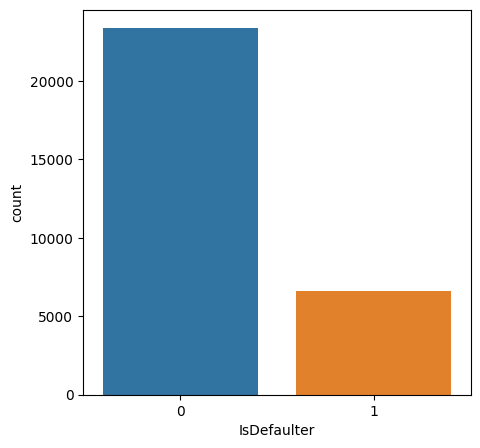

In [23]:
#values count plot of IsDefaulter
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df)

**1. Why did you pick the specific chart?**

This gives us clear picture of distribution of our Target Variable.

**2. What is/are the insight(s) found from the chart?**

Around more than 5000 of the payments are default. Its a huge number.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

This chart actually gives us motive to make a prediction model. so that these transections should be stopped.

####Male vs Female

Text(0.5, 0, 'Sex  1:Male   2: Female')

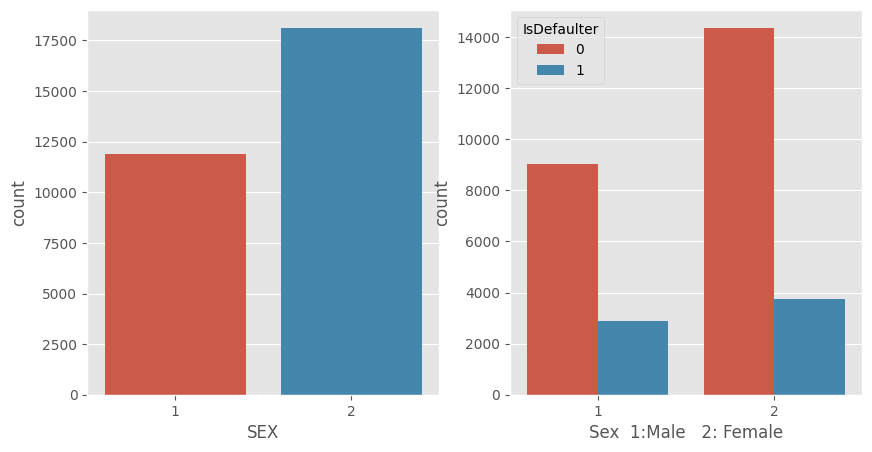

In [33]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)
plt.xlabel('Sex  1:Male   2: Female')

**1. Why did you pick the specific chart?**

It shows the difference between male and female default ratio.

**2. What is/are the insight(s) found from the chart?**

It is clear that female tend to have more defaults than male. Females are the major user of credit cards.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Females are the major revenue for credit cards. Banks need to create some new policies to reduce the defaults.

<Axes: xlabel='EDUCATION', ylabel='count'>

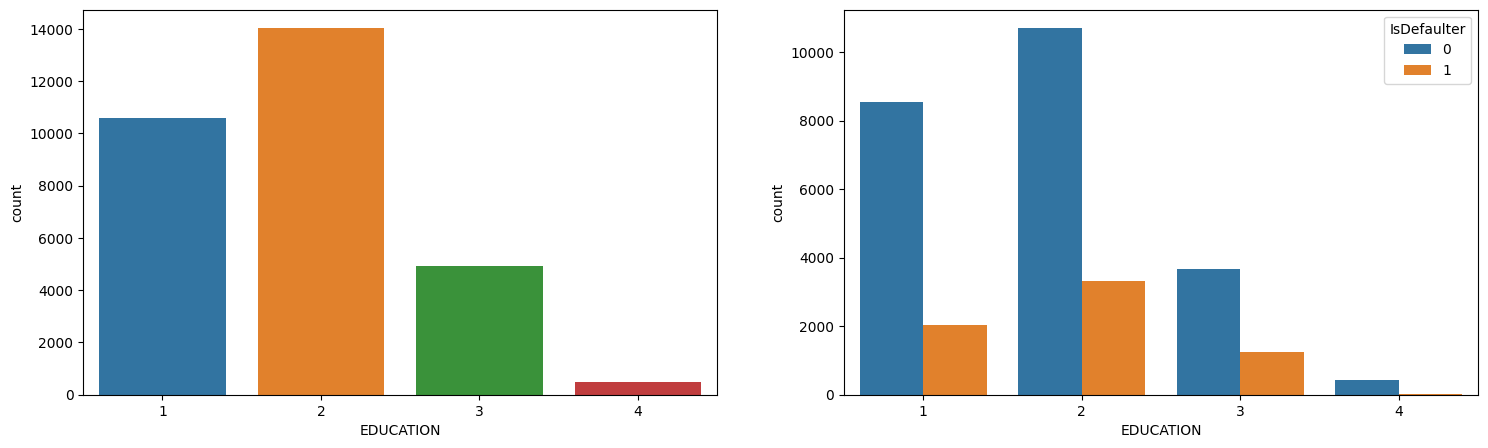

In [25]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)

**1. Why did you pick the specific chart?**

It shows the literate group that mostly found to default.

**2. What is/are the insight(s) found from the chart?**

University students are highest to use credit cards and to default as well followed by gradute school and high school.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Banks should put on regulations on the basis of education and background.

<Axes: xlabel='MARRIAGE', ylabel='count'>

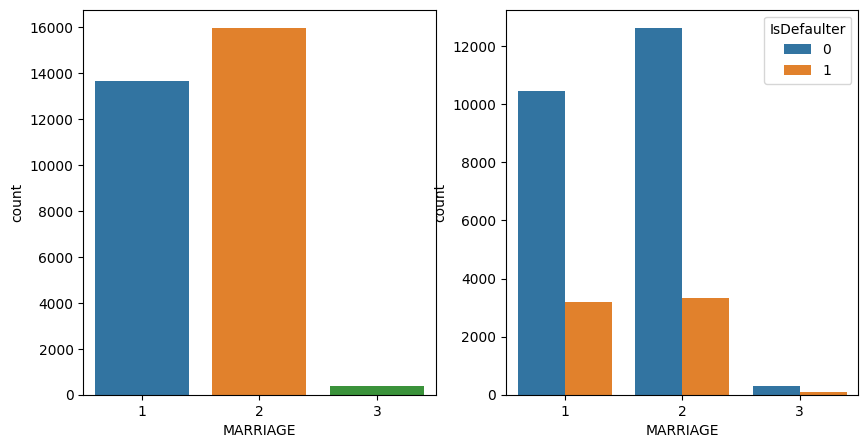

In [26]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

**1. Why did you pick the specific chart?**

This chart depicts the marital status of credit card holders.

**2. What is/are the insight(s) found from the chart?**

Unmarried people tend to have more credit cards than married but the difference is not that much.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

There is no significant differece between married and unmarried people getting default. It does not signify any business impact as per data.

####Age Group

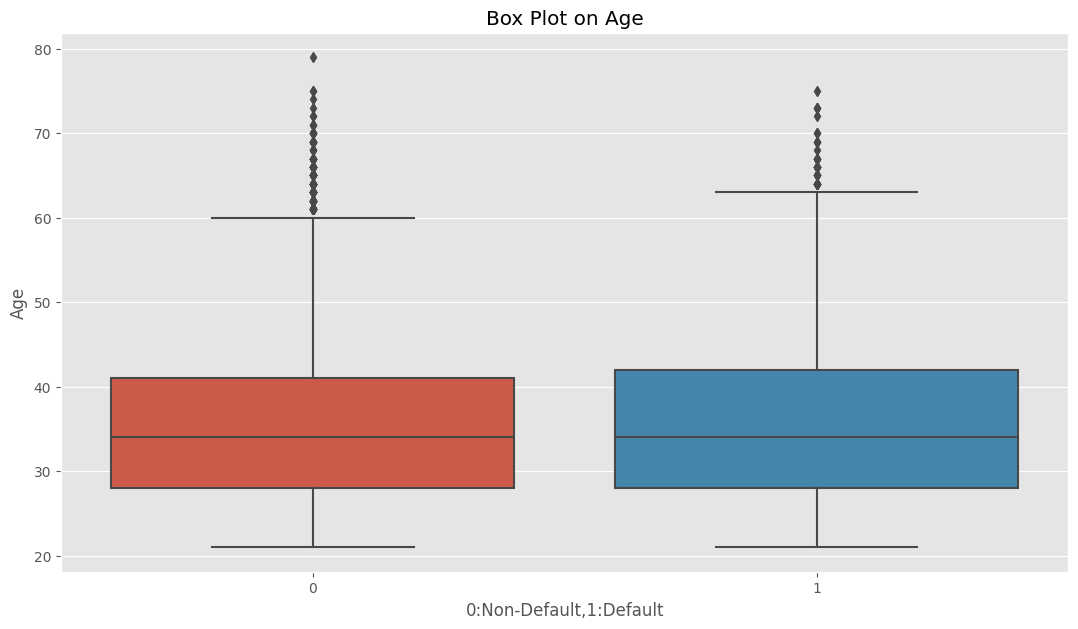

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Box Plot on Age")
sns.boxplot(x='IsDefaulter',y='AGE',data=df)
plt.ylabel("Age")
plt.xlabel('0:Non-Default,1:Default')
plt.show()

**1. Why did you pick the specific chart?**

this chart depicts the age group of most number of users.

**2. What is/are the insight(s) found from the chart?**

Major number of users are aged from 30 to 40 years and even defaulters are in the same group.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Banks can target different age group by providing various offer to increase revenue. Here, Defaulters and Non-Defaulters are in the same age group, so this insight do contribute to business.

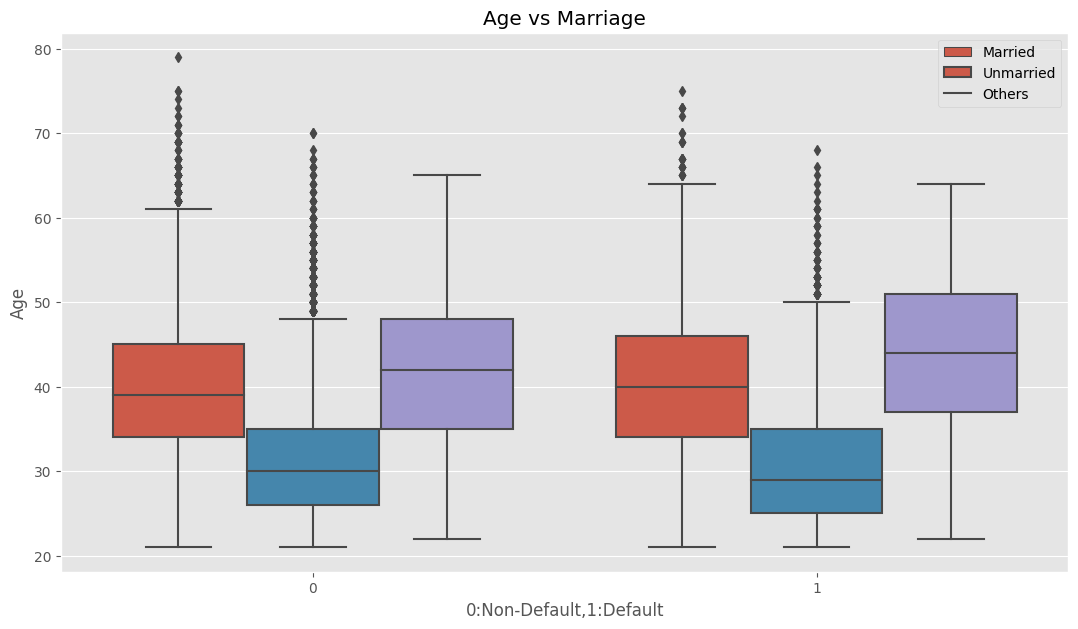

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Age vs Marriage")
sns.boxplot(x='IsDefaulter',hue='MARRIAGE', y='AGE',data=df)
plt.ylabel("Age")
plt.xlabel('0:Non-Default,1:Default')
plt.legend(['Married','Unmarried','Others'])
plt.show()

**1. Why did you pick the specific chart?**

This multivariate analysis helps us to get different age group according to their marital stauts.

**2. What is/are the insight(s) found from the chart?**

Most married users using credit cards are aged between 35 to 45 and unmarried users are aged between 25 to 35. where as others are aged between 35 to 50. That can be possible that they married users.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

The age group is same in both cases. so it does not give business impact.

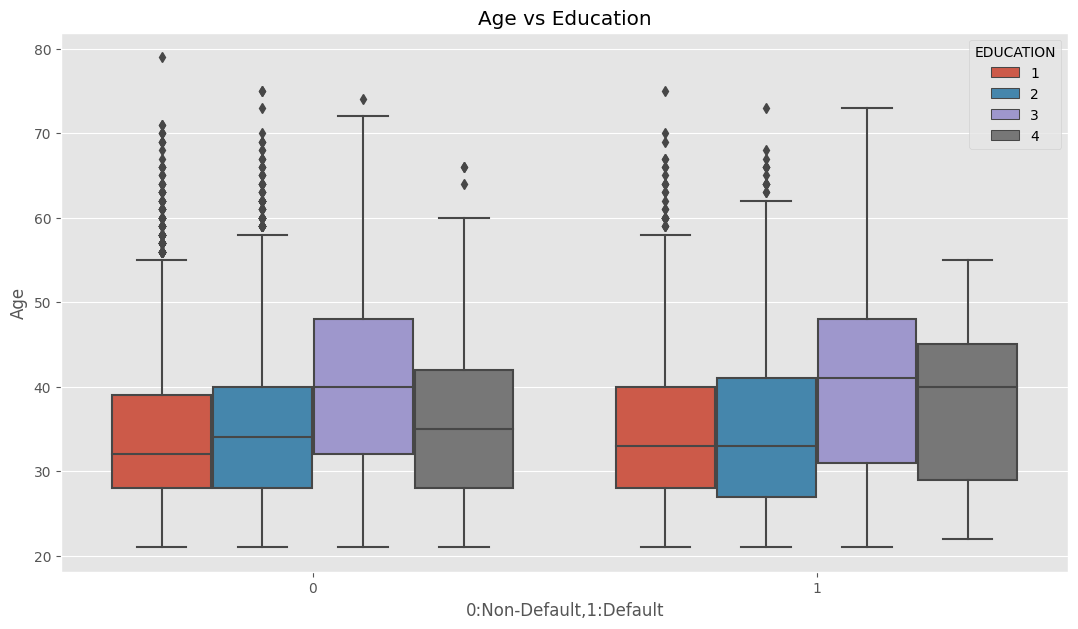

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Age vs Education")
sns.boxplot(x='IsDefaulter',hue='EDUCATION', y='AGE',data=df)
plt.ylabel("Age")
plt.xlabel('0:Non-Default,1:Default')
plt.show()

**1. Why did you pick the specific chart?**

It depicts the age group on the basis of education.

**2. What is/are the insight(s) found from the chart?** 

Interestingly, high school group is aged more, ranges from 35 to 45. it tend to deafualt the same.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Even This chart does not help us finding the difference between deafualts and non defaulters.

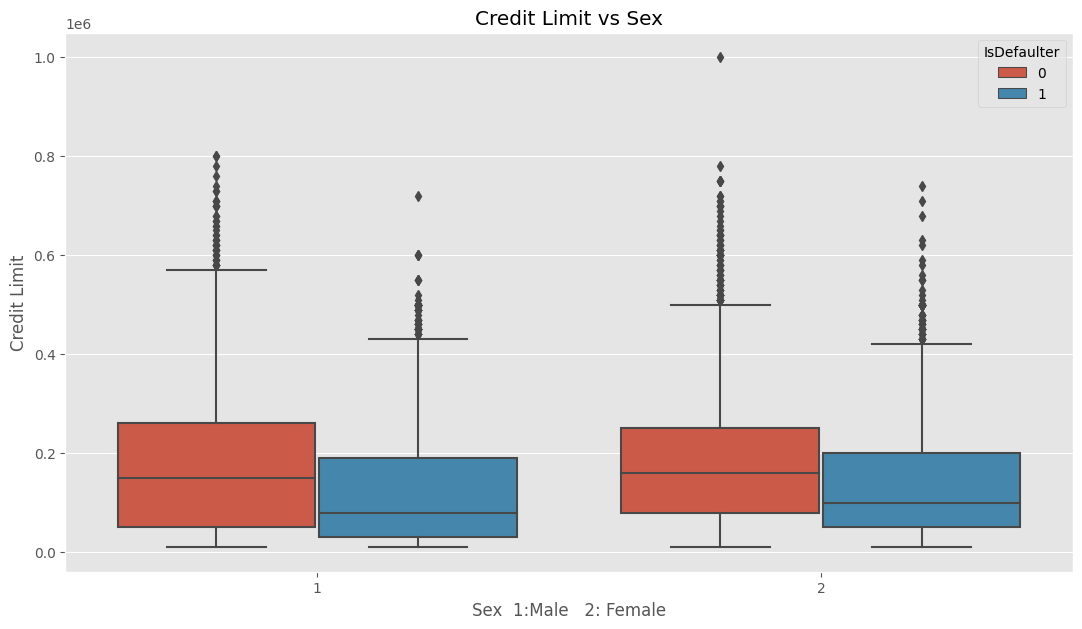

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Credit Limit vs Sex")
sns.boxplot(x='SEX',y='LIMIT_BAL',hue='IsDefaulter',data=df)
plt.ylabel("Credit Limit")
plt.xlabel('Sex  1:Male   2: Female')
plt.show()

**1. Why did you pick the specific chart?**

This chart shows us the major diffence between defaulters and no defaulters credit range while considering the sex.

**2. What is/are the insight(s) found from the chart?**

Defaulters have less credit limit than non defaulters not going avove 20000 Dollors.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Users with less limit tend to default more. Banks can create the lower limit so that some defaulters can be eliminated.

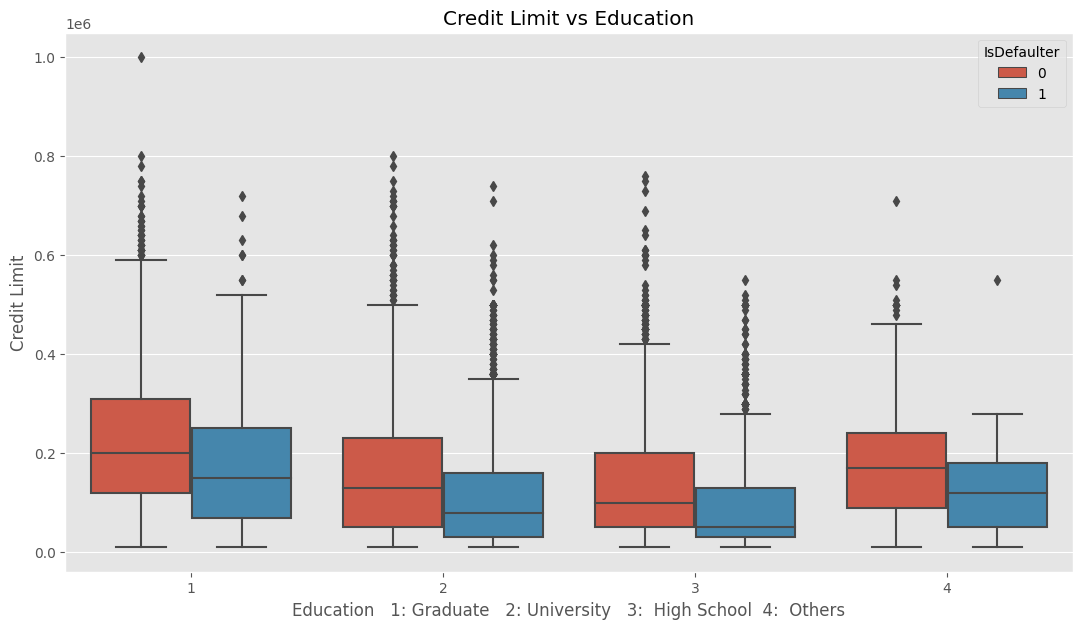

In [34]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Credit Limit vs Education")
sns.boxplot(x='EDUCATION',y='LIMIT_BAL',hue='IsDefaulter',data=df)
plt.ylabel("Credit Limit")
plt.xlabel('Education   1: Graduate   2: University   3:  High School  4:  Others')
plt.show()

**1. Why did you pick the specific chart?**

This chart shows the credit limit of different education group white considering default payment.

**2. What is/are the insight(s) found from the chart?**

Credit limit is majorly more in graduated users and lowest in high school users.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

In previous charts it is shown that high school group is aged the most and here the credit limit of the higher school is less. That clearly states more the age lesser the credit limit.

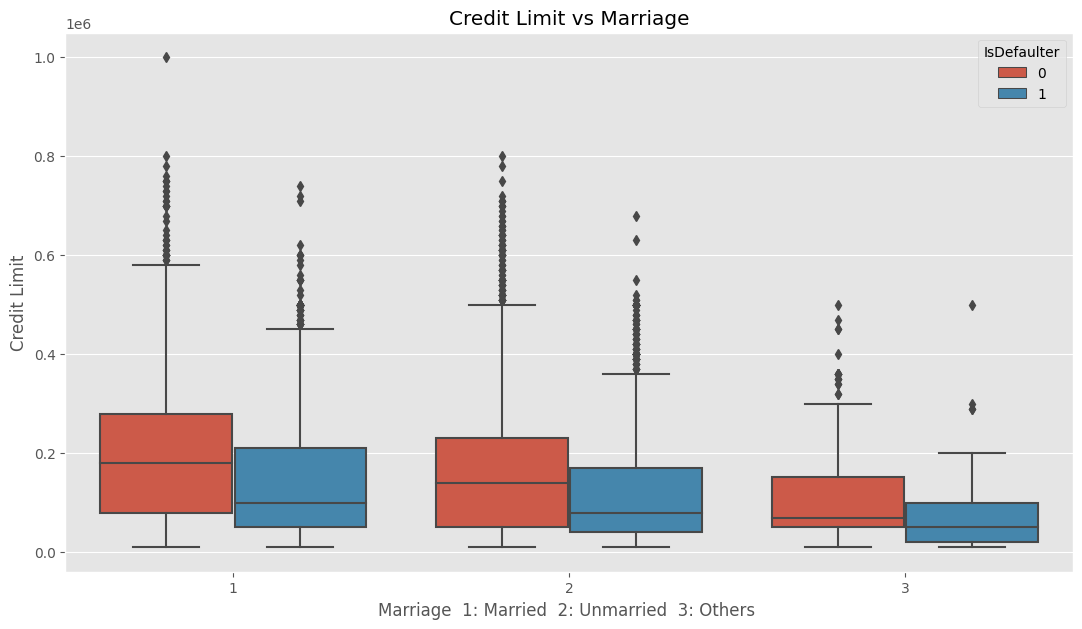

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Credit Limit vs Marriage")
sns.boxplot(x='MARRIAGE',y='LIMIT_BAL',hue='IsDefaulter',data=df)
plt.ylabel("Credit Limit")
plt.xlabel('Marriage  1: Married  2: Unmarried  3: Others ')
plt.show()

**1. Why did you pick the specific chart?**

This chart shows credit limit of users of different marital status while considering the defaults.

**2. What is/are the insight(s) found from the chart?**

Married user tend to have more credit limit than unmarried users. defaulters in married users do have more credit limit.

**3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

here also, a lower limit should be decided. when issuing a credit card with less amount, a backgroud check should retictly followed.

Text(0.5, 1.0, 'Heatmap')

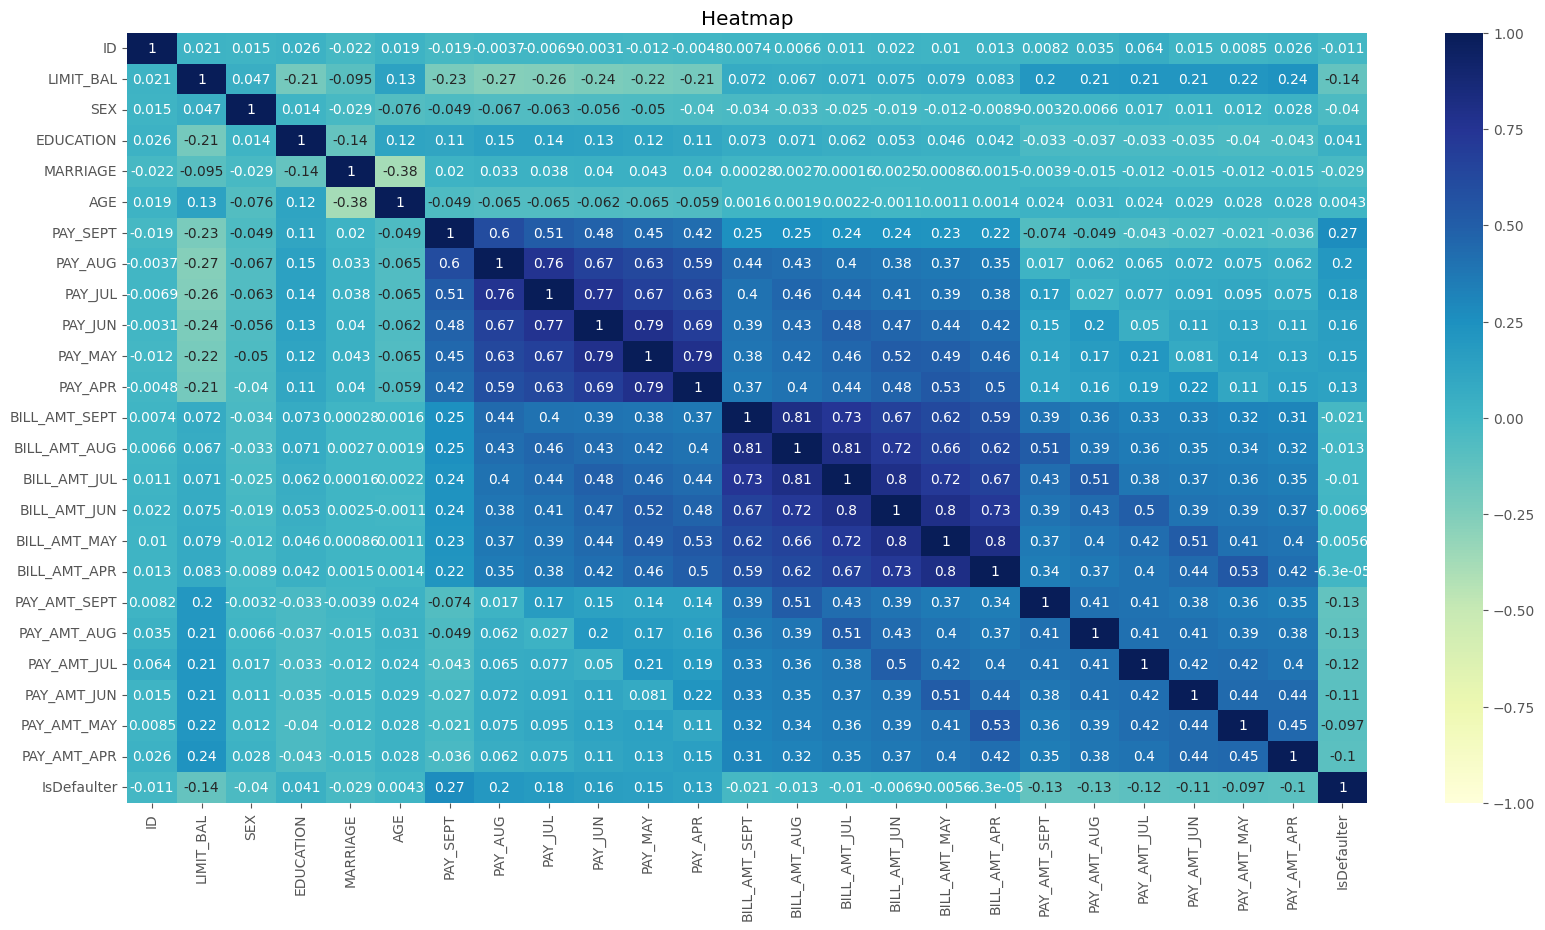

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(df.astype(float).corr(method='kendall'), cmap="YlGnBu", annot=True,vmin=-1,vmax=1)
plt.title('Heatmap')

**1. Why did you pick the specific chart?**

This chart shows the the correlation between each factors.

**2. What is/are the insight(s) found from the chart?**

There is not strong correlation between fetures except bill amount and payment made. that totally make sense.

In [ ]:
df['LIMIT_BAL'].max()

1000000

In [ ]:
df['LIMIT_BAL'].min()

10000

In [ ]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

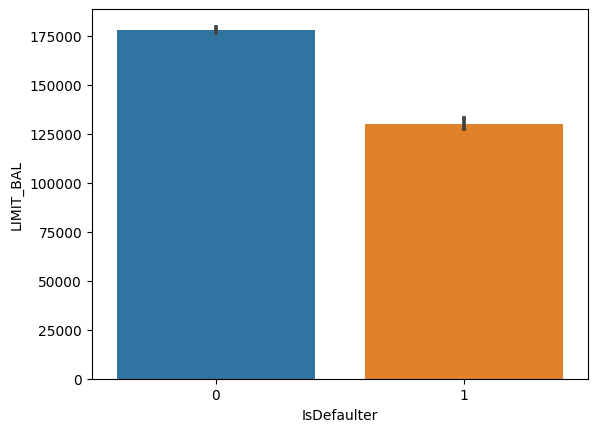

In [ ]:
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

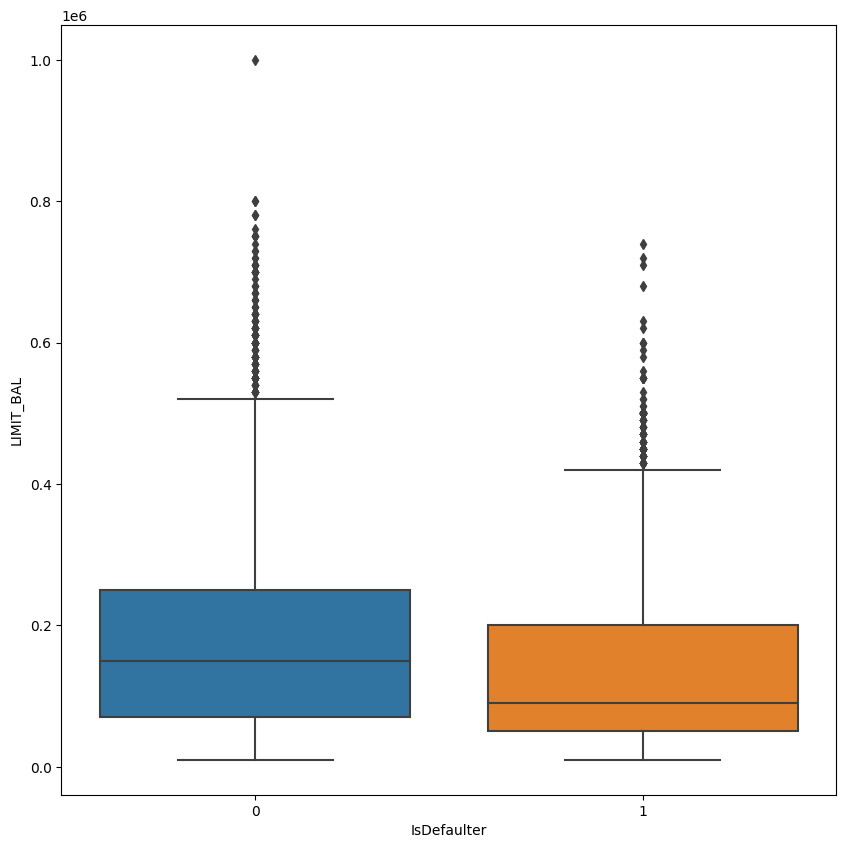

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

In [ ]:
df.groupby('IsDefaulter')['AGE'].mean()

IsDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

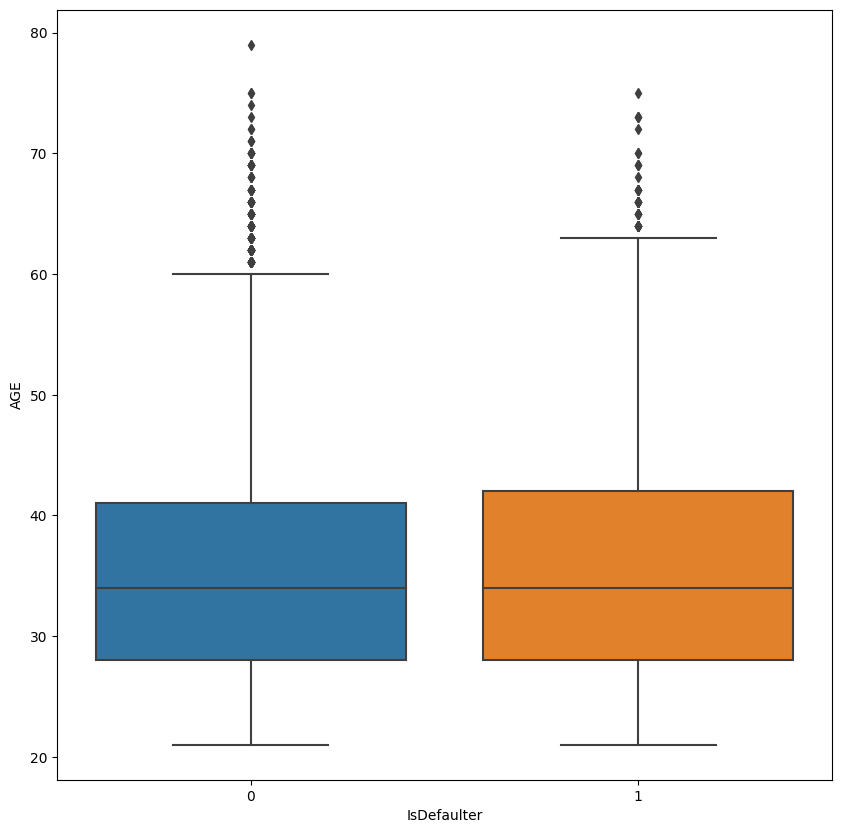

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

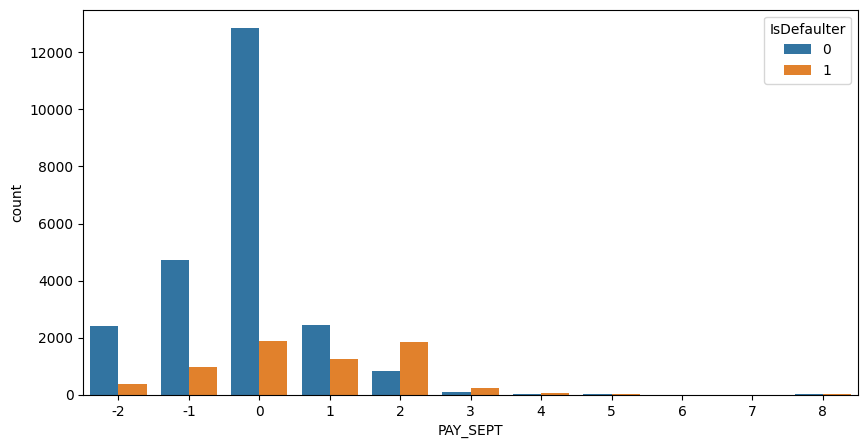

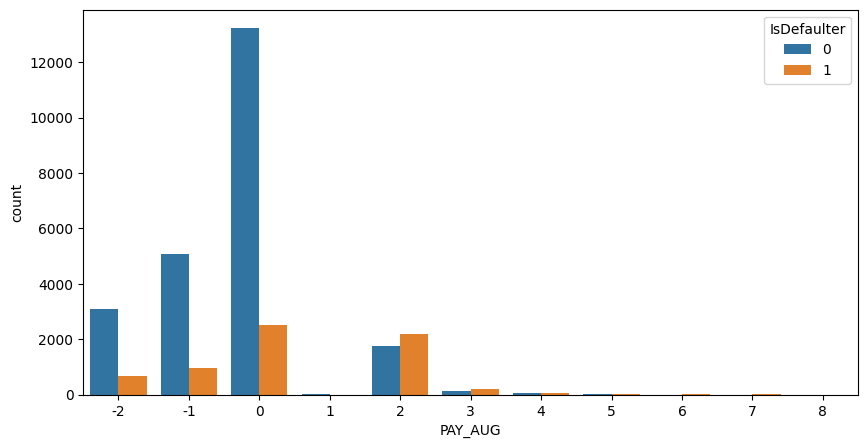

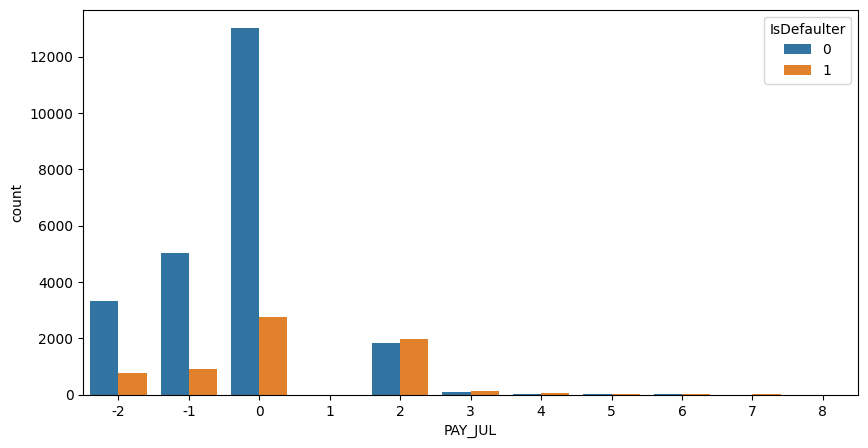

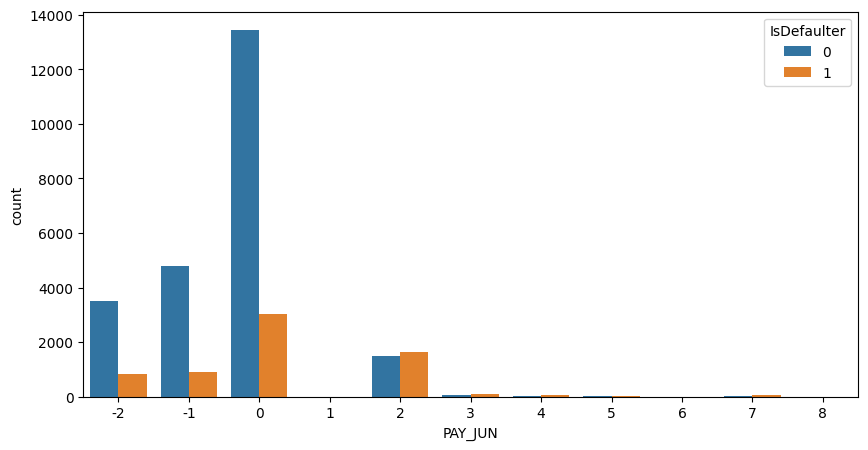

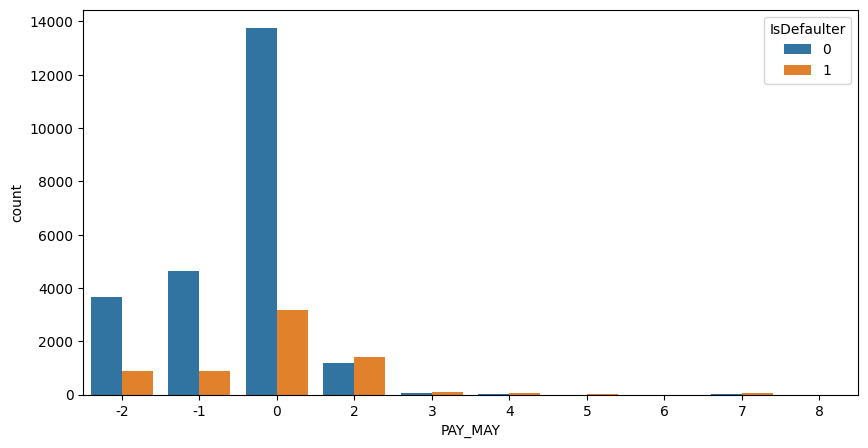

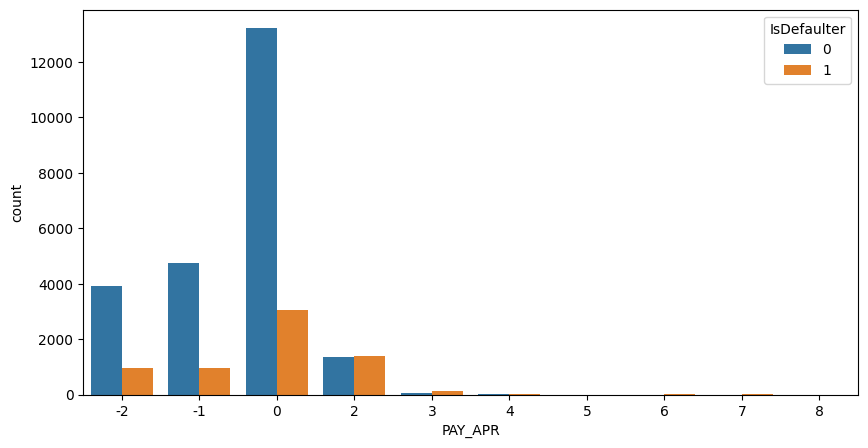

In [ ]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

In [ ]:
df.shape

(30000, 25)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,8308,20000,1,1,1,26,1,0,0,0,...,19832,14054,10397,19497,2000,4722,316,314,11449,324
46724,1228,30000,2,2,1,26,0,0,0,0,...,29428,24823,21524,6866,926,1463,769,2098,4314,126
46725,26264,306106,1,2,1,44,0,0,0,0,...,235434,232379,233189,231998,236897,8702,8002,10817,8136,6314
46726,7752,360000,2,1,1,40,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
columns = list(df.columns)

In [ ]:
columns.pop()

'IsDefaulter'

In [ ]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [ ]:
balance_df['IsDefaulter'] = y_smote

In [ ]:
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,8308,20000,1,1,1,26,1,0,0,0,...,14054,10397,19497,2000,4722,316,314,11449,324,1
46724,1228,30000,2,2,1,26,0,0,0,0,...,24823,21524,6866,926,1463,769,2098,4314,126,1
46725,26264,306106,1,2,1,44,0,0,0,0,...,232379,233189,231998,236897,8702,8002,10817,8136,6314,1
46726,7752,360000,2,1,1,40,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
new_df = balance_df.copy()

In [ ]:
new_df['Payement_Value'] = new_df['PAY_SEPT'] + new_df['PAY_AUG'] + new_df['PAY_JUL'] + new_df['PAY_JUN'] + new_df['PAY_MAY'] + new_df['PAY_APR']

In [ ]:
new_df.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.980140
1    1.649204
Name: Payement_Value, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='Payement_Value'>

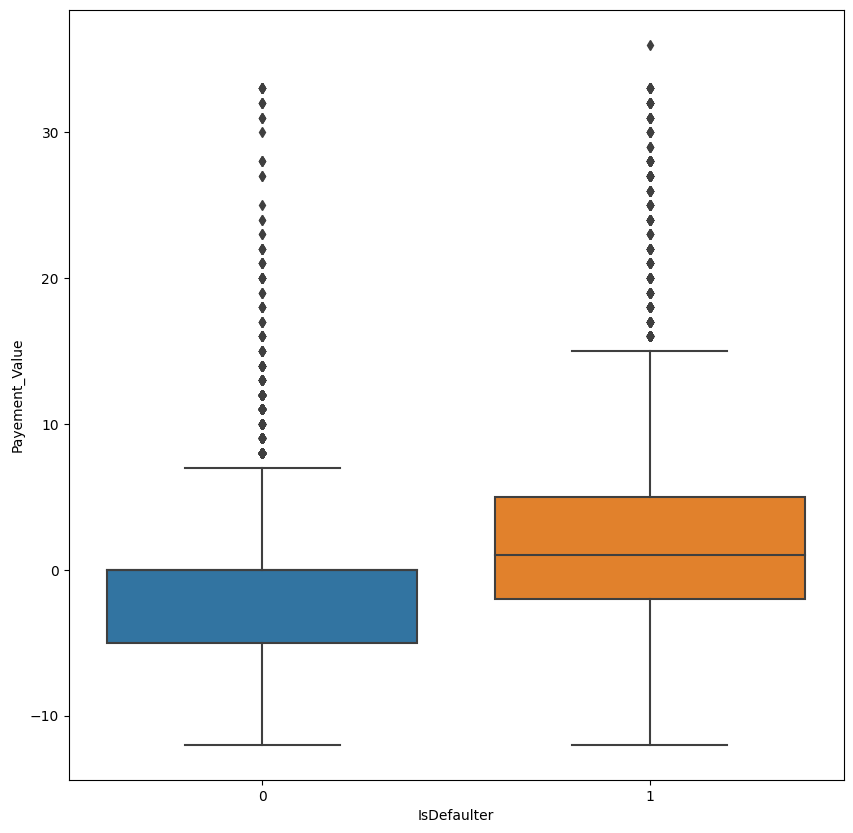

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = new_df, x = 'IsDefaulter', y = 'Payement_Value' )

In [ ]:
new_df['Dues'] = (new_df['BILL_AMT_APR']+new_df['BILL_AMT_MAY']+new_df['BILL_AMT_JUN']+new_df['BILL_AMT_JUL']+new_df['BILL_AMT_SEPT'])-(new_df['PAY_AMT_APR']+new_df['PAY_AMT_MAY']+new_df['PAY_AMT_JUN']+new_df['PAY_AMT_JUL']+new_df['PAY_AMT_SEPT'])

In [ ]:
new_df.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    194382.516607
1    196710.437425
Name: Dues, dtype: float64

In [ ]:
new_df['EDUCATION'].unique()

array([2, 1, 3, 4])

In [ ]:
new_df['EDUCATION']=np.where(new_df['EDUCATION'] == 6, 4,new_df['EDUCATION'])
new_df['EDUCATION']=np.where(new_df['EDUCATION'] == 0, 4, new_df['EDUCATION'])

In [ ]:
new_df['MARRIAGE'].unique()

array([1, 2, 3])

In [ ]:
new_df['MARRIAGE']=np.where(new_df['MARRIAGE'] == 0, 3, new_df['MARRIAGE'])

In [ ]:
new_df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE':{1:'married',2:'single',3:'others'}})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,4602
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,11352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,78108
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,176732
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,81301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,8308,20000,MALE,graduate school,married,26,1,0,0,0,...,19497,2000,4722,316,314,11449,324,1,1,67051
46724,1228,30000,FEMALE,university,married,26,0,0,0,0,...,6866,926,1463,769,2098,4314,126,1,0,102690
46725,26264,306106,MALE,university,married,44,0,0,0,0,...,231998,236897,8702,8002,10817,8136,6314,1,0,776890
46726,7752,360000,FEMALE,graduate school,married,40,1,-2,-2,-2,...,0,0,0,0,0,0,0,1,-9,0


In [ ]:
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,4602
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,11352
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,78108
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,176732
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,81301


In [ ]:
new_df = pd.get_dummies(new_df, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [ ]:
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,2,2,1,24,3913,3102,689,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,2,2,2,26,2682,1725,2682,3272,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,2,2,2,34,29239,14027,13559,14331,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,2,2,1,37,46990,48233,49291,28314,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,2,1,57,8617,5670,35835,20940,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
new_df = new_df.replace(encoders_nums)

In [ ]:
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,2,2,1,24,3913,3102,689,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,2,2,2,26,2682,1725,2682,3272,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,2,2,2,34,29239,14027,13559,14331,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,2,2,1,37,46990,48233,49291,28314,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,2,1,57,8617,5670,35835,20940,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
new_df.drop('ID',axis = 1, inplace = True)

In [ ]:
new_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,2,2,1,24,3913,3102,689,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,2,2,2,26,2682,1725,2682,3272,3455,...,0,0,0,1,0,0,0,0,0,0
2,90000,2,2,2,34,29239,14027,13559,14331,14948,...,0,1,0,0,0,0,0,0,0,0
3,50000,2,2,1,37,46990,48233,49291,28314,28959,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,2,1,57,8617,5670,35835,20940,19146,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
x = new_df.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = new_df['IsDefaulter']

In [ ]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'PAY_SEPT_-1',
       'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4',
       'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1',
       'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4',
       'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1',
       'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4',
       'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-1',
       'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3', 'PAY_JUN_4',
       'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8', 'PAY_MAY_-1',
       'PAY_MAY_0', 'PAY_MAY_1', 'PAY_MAY_2', 'PAY_MAY_3', 'PAY_MAY_4',
       'PAY_MAY_5', 'PAY_MAY_6', 'PAY_MAY_7', 'PAY_MAY_8

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify = y)

In [ ]:
x_train

array([[-0.10802694, -1.01227357, -1.08342717, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [-0.34636947,  0.98787525,  0.34932746, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [ 0.52755315, -1.01227357,  0.34932746, ..., -0.03494732,
        -0.04141222, -0.00654238],
       ...,
       [-0.98194956, -1.01227357,  1.78208208, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [ 0.60700066, -1.01227357, -1.08342717, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [-0.18747445, -1.01227357, -1.08342717, ..., -0.03494732,
        -0.04141222, -0.00654238]])

In [ ]:
x_test

array([[ 1.40147578,  0.98787525,  0.34932746, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [-0.82305454,  0.98787525, -1.08342717, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [ 0.44810564,  0.98787525,  0.34932746, ..., -0.03494732,
        -0.04141222, -0.00654238],
       ...,
       [ 0.1303156 , -1.01227357,  0.34932746, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [ 1.49392885, -1.01227357, -1.08342717, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [-0.82305454, -1.01227357,  0.34932746, ..., -0.03494732,
        -0.04141222, -0.00654238]])

In [ ]:
#fitting data into Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#class prediction of y
y_pred_lr = lr.predict(x_test)
y_train_pred_lr=lr.predict(x_train)

In [ ]:
#getting all scores for Logistic Regression
train_accuracy_lr = round(accuracy_score(y_train_pred_lr,y_train),4)
accuracy_lr = round(accuracy_score(y_pred_lr,y_test),4)
precision_score_lr = round(precision_score(y_pred_lr,y_test),4)
recall_score_lr = round(recall_score(y_pred_lr,y_test),4)
f1_score_lr = round(f1_score(y_pred_lr,y_test),4)
roc_score_lr = round(roc_auc_score(y_pred_lr,y_test),4)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", accuracy_lr)
print("The precision on test data is ", precision_score_lr)
print("The recall on test data is ", recall_score_lr)
print("The f1 on test data is ", f1_score_lr)
print("The roc_score on test data is ", roc_score_lr)

The accuracy on train data is  0.7538
The accuracy on test data is  0.7522
The precision on test data is  0.6921
The recall on test data is  0.7867
The f1 on test data is  0.7363
The roc_score on test data is  0.7559


[[3796  877]
 [1439 3234]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

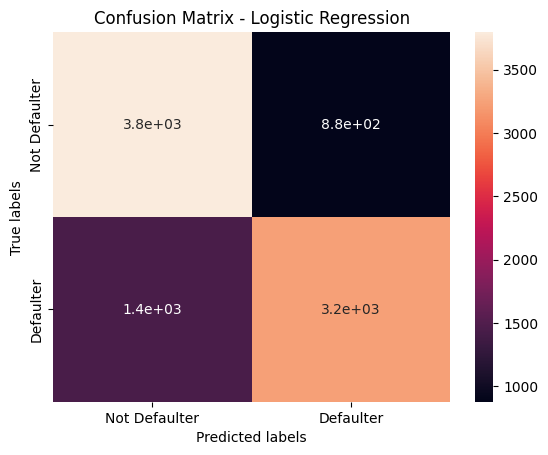

In [ ]:
# Get the confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_lr)
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#class prediction of y
y_train_pred_dtc=dtc.predict(x_train)
y_pred_dtc = dtc.predict(x_test)

In [ ]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 4)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 4)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 4)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 4)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 4)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 4)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  0.9991
The accuracy on test data is  0.755
The precision on test data is  0.7659
The recall on test data is  0.7495
The f1 on test data is  0.7576
The roc_score on test data is  0.7551


[[3477 1196]
 [1094 3579]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

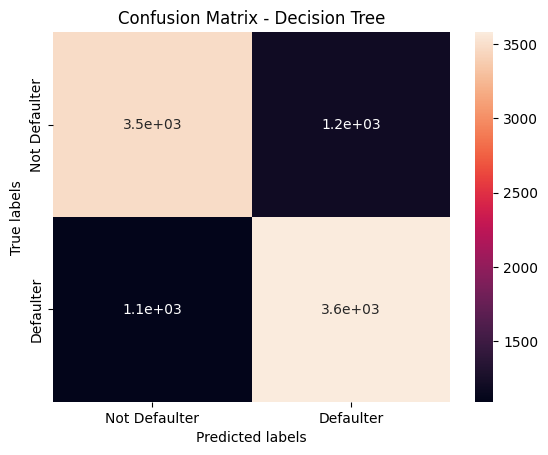

In [ ]:
# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc )
print(cm_dtc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
#class prediction of y
y_train_pred_rfc=rfc.predict(x_train)
y_pred_rfc=rfc.predict(x_test)

In [ ]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 4)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 4)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 4)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 4)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 4)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 4)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.839
The precision on test data is  0.8042
The recall on test data is  0.8643
The f1 on test data is  0.8332
The roc_score on test data is  0.8406


[[4083  590]
 [ 915 3758]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

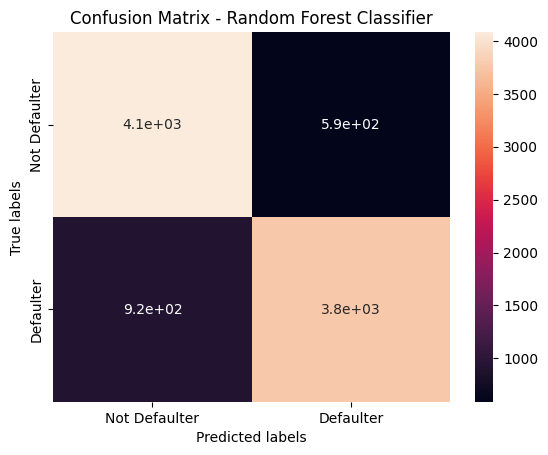

In [ ]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(x_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
#class prediction of y
y_pred_gbc=gbc.predict(x_test)
y_train_pred_gbc=gbc.predict(x_train)

In [ ]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train),4)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test),4)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test),4)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test),4)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test),4)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test),4)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.7875
The accuracy on test data is  0.7842
The precision on test data is  0.7323
The recall on test data is  0.8171
The f1 on test data is  0.7724
The roc_score on test data is  0.7873


[[3907  766]
 [1251 3422]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

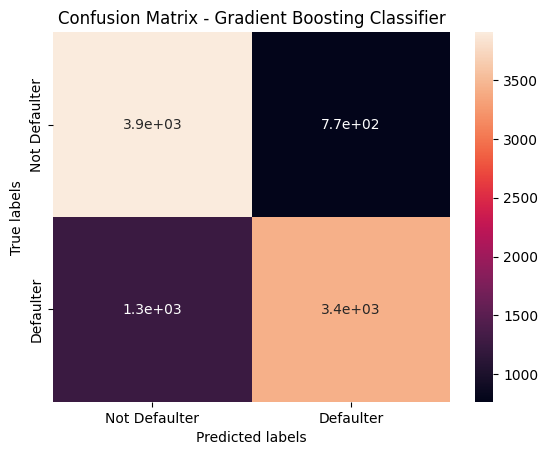

In [ ]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [ ]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#class prediction of y
y_pred_xgb=xgb.predict(x_test)
y_train_pred_xgb=xgb.predict(x_train)

In [ ]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train),4)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test),4)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test),4)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test),4)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test),4)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test),4)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.8805
The accuracy on test data is  0.8228
The precision on test data is  0.7879
The recall on test data is  0.847
The f1 on test data is  0.8164
The roc_score on test data is  0.8244


[[4008  665]
 [ 991 3682]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

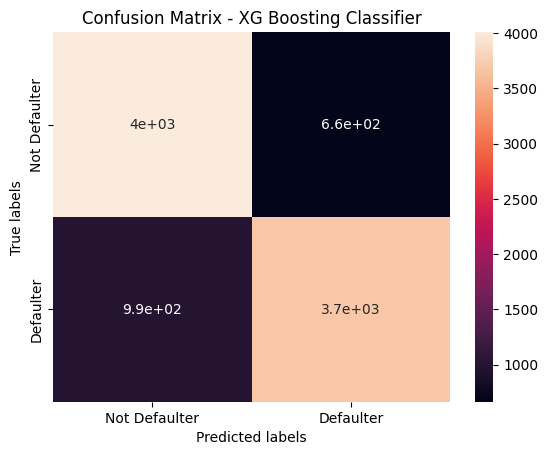

In [ ]:
# Get the confusion matrix for XG Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest','Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_lr, train_accuracy_dtc, train_accuracy_rfc,train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_lr, accuracy_dtc, accuracy_rfc,accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_lr, precision_score_dtc, precision_score_rfc,precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_lr, recall_score_dtc, recall_score_rfc,recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_lr, f1_score_dtc, f1_score_rfc,f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_lr, roc_score_dtc, roc_score_rfc,roc_score_gbc, roc_score_xgb]

In [ ]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall':all_recall_score,'F1 Score':all_f1_score,'AUC':all_auc_score})

In [ ]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.7538,0.7522,0.6921,0.7867,0.7363,0.7559
1,Decision Tree,0.9991,0.7550,0.7659,0.7495,0.7576,0.7551
2,Random Forest,0.9990,0.8390,0.8042,0.8643,0.8332,0.8406
3,Gradient Boosting,0.7875,0.7842,0.7323,0.8171,0.7724,0.7873
4,XG Boosting,0.8805,0.8228,0.7879,0.8470,0.8164,0.8244


In [ ]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
2,Random Forest,0.9990,0.8390,0.8042,0.8643,0.8332,0.8406
4,XG Boosting,0.8805,0.8228,0.7879,0.8470,0.8164,0.8244
3,Gradient Boosting,0.7875,0.7842,0.7323,0.8171,0.7724,0.7873
1,Decision Tree,0.9991,0.7550,0.7659,0.7495,0.7576,0.7551
0,Logistic Regression,0.7538,0.7522,0.6921,0.7867,0.7363,0.7559


In [ ]:
#importing roc curve
from sklearn.metrics import roc_curve

In [ ]:
#probabilty prediction of y for all model
y_pred_proba_lr = lr.predict_proba(x_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(x_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(x_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(x_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(x_test)[:,1]

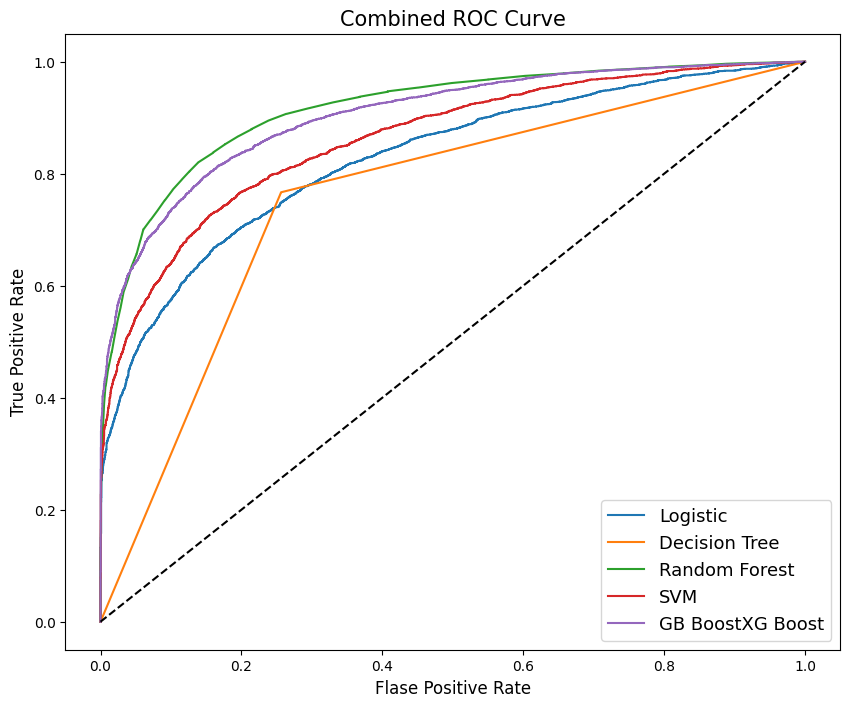

In [ ]:
fig = plt.figure(figsize=(10,8)) 

fpr_lr, tpr_lr, _lr = roc_curve(y_test,  y_pred_proba_lr)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_lr, tpr_lr)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "SVM", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [0.0001, 0.001, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500, 5000],
              'C' : C }

In [ ]:
# Create an instance of the Logistic Regression
lr = LogisticRegression()

# Grid search
lr_grid = GridSearchCV(estimator=lr,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')

In [ ]:
# The maximum depth of the tree
depth_of_tree = [20,25,30,35]

In [ ]:
# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

In [ ]:
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]


In [ ]:
# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [ ]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

In [ ]:

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [ ]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=35, min_samples_leaf=40,
                       min_samples_split=0.001)

In [ ]:
dtc_grid.best_params_

{'max_depth': 35, 'min_samples_leaf': 40, 'min_samples_split': 0.001}

In [ ]:
dtc_optimized_model = dtc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimized_model.predict(x_test)
y_train_pred_dtc_grid=dtc_optimized_model.predict(x_train)

In [ ]:
# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimized_model.predict_proba(x_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimized_model.predict_proba(x_test)[:,1]

In [ ]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train),4)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test),4)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test),4)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test),4)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test),4)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test),4)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.792
The accuracy on test data is  0.7492
The precision on test data is  0.7212
The recall on test data is  0.764
The f1 on test data is  0.742
The auc on test data is  0.75


In [ ]:
# Get the confusion matrices for train and test
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid )

In [ ]:
train_cm_dtc_grid

array([[15338,  3353],
       [ 4422, 14269]])

In [ ]:
test_cm_dtc_grid

array([[3632, 1041],
       [1303, 3370]])

In [ ]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

In [ ]:
# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.8s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.4s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.6s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   8.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   8.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.9s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [ ]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=150)

In [ ]:
rfc_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 150}

In [ ]:
rfc_optimal_model = rfc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(x_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(x_train)

# Get the probabilities on train and test
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(x_test)[:,1]


In [ ]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train),4)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test),4)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test),4)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test),4)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test),4)
auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test),4)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)
print("The auc on test data is ", auc_rfc_grid)

The accuracy on train data is  0.8003
The accuracy on test data is  0.7883
The precision on test data is  0.7293
The recall on test data is  0.8268
The f1 on test data is  0.775
The auc on test data is  0.7923


In [ ]:
# Get the confusion matrices for train and test
train_cm_rfc_grid = confusion_matrix(y_train,y_train_pred_rfc_grid)
test_cm_rfc_grid = confusion_matrix(y_test,y_pred_rfc_grid )

In [ ]:
train_cm_rfc_grid

array([[16048,  2643],
       [ 4824, 13867]])

In [ ]:
test_cm_rfc_grid

array([[3959,  714],
       [1265, 3408]])